In [32]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector


ModuleNotFoundError: No module named 'sklearn_pandas'

In [2]:
from sklearn.model_selection import train_test_split


In [3]:
df=pd.read_csv("titanic_dataset.csv")

In [4]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.shape

(891, 12)

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

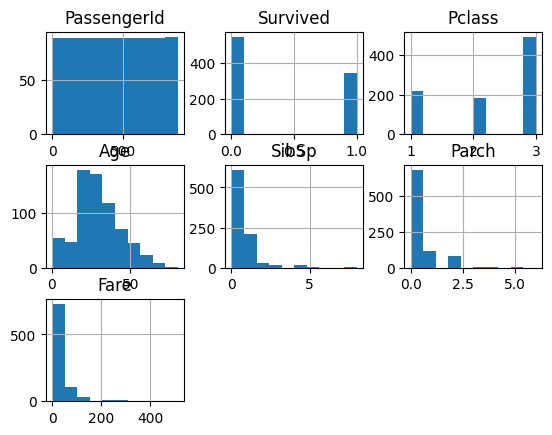

In [8]:
df.hist()

In [9]:
df.isnull().count() #dataset = clean no #na

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          891
Embarked       891
dtype: int64

In [10]:
#last check
df.query('Survived>0').count()

PassengerId    342
Survived       342
Pclass         342
Name           342
Sex            342
Age            290
SibSp          342
Parch          342
Ticket         342
Fare           342
Cabin          136
Embarked       340
dtype: int64

In [11]:
df.groupby('Survived')['Sex'].count().to_frame()

,Sex
Survived,
0,549
1,342


In [12]:
df['Age']=df['Age'].fillna(28)

In [13]:
df.query('Survived==0').count()

PassengerId    549
Survived       549
Pclass         549
Name           549
Sex            549
Age            549
SibSp          549
Parch          549
Ticket         549
Fare           549
Cabin           68
Embarked       549
dtype: int64

In [14]:
df.drop(columns=['Name','Embarked','Cabin','Ticket'])

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000
887,888,1,1,female,19.0,0,0,30.0000
888,889,0,3,female,28.0,1,2,23.4500
889,890,1,1,male,26.0,0,0,30.0000


In [15]:
df['Sex_numerisation']=''

In [16]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_numerisation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,


In [17]:
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Sex_numerisation']

In [18]:
#vérifier pourquoi cette syntaxe ne passse pas...
X=['Age']
y=['Fare']

In [19]:
#X est un DataFrame au lieu d’une série. regplot attend une série (ou une seule colonne), pas un tableau à plusieurs colonnes.

In [20]:
len(X), len(y)

(1, 1)

<Axes: xlabel='Age', ylabel='Fare'>

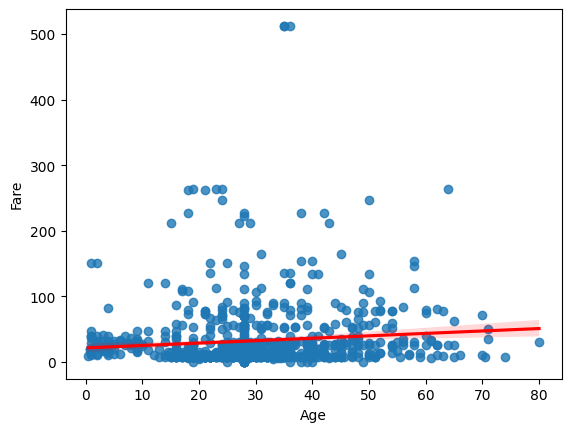

In [21]:
sns.regplot(data=df, x='Age', y='Fare', line_kws={'color': 'r'})

In [22]:
X=df.drop(columns=['Survived'])
y=df['Survived']

In [23]:
# X=df.dtypes(int64, float64) : attribut pas une fonction ??but
# y=df.dtypes(object)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       891 non-null    int64  
 1   Survived          891 non-null    int64  
 2   Pclass            891 non-null    int64  
 3   Name              891 non-null    object 
 4   Sex               891 non-null    object 
 5   Age               891 non-null    float64
 6   SibSp             891 non-null    int64  
 7   Parch             891 non-null    int64  
 8   Ticket            891 non-null    object 
 9   Fare              891 non-null    float64
 10  Cabin             204 non-null    object 
 11  Embarked          889 non-null    object 
 12  Sex_numerisation  891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [40]:
#alternative
numerical=df[['PassengerId','Survived', 'Pclass', 'SibSp', 'Parch']]
categorical=df[['Sex','Cabin', 'Embarked']]

In [41]:
x_train, x_test, y_train, y_test = train_test_split (X, y, test_size=0.2, train_size=0.8, random_state=42)

***Avec pipeline : tu définis les colonnes à sélectionner, puis tu ajoutes directement tes transformers dans le pipeline, et .fit / .transform s’appliquent automatiquement sur le DataFrame complet***

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [61]:
numerical_preproc = Pipeline([
    ("numerical_imput", SimpleImputer(strategy='mean')),
    ("numerical_scaler", MinMaxScaler())
])


In [64]:
categorical_preproc = Pipeline([
    ("categorical_encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])


In [66]:
from sklearn.compose import make_column_transformer, make_column_selector

preproc = make_column_transformer(
    (numerical_preproc, make_column_selector(dtype_include=[int, float])),
    (categorical_preproc, make_column_selector(dtype_include=object))
)


***Sans pipeline : tu sélectionnes manuellement tes colonnes (df[...]), tu instancies tes modèles, et tu appliques .fit_transform sur les matrices / arrays résultants.***

In [49]:
simpleImputer = SimpleImputer(strategy='mean')
mm_scaler = MinMaxScaler()
numerical_imputed = simpleImputer.fit_transform(numerical)
numerical_scaled = mm_scaler.fit_transform(numerical_imputed)


In [ ]:
# handle_unknown="ignore" → ignore les catégories nouvelles non vues à l’entraînement.
# sparse_output=False → retourne un array dense (DataFrame/NumPy) au lieu d’une matrice creuse (sparse).

In [52]:
from sklearn.preprocessing import OneHotEncoder

categorical = df[['Sex','Cabin','Embarked']]
oheencoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
categorical_encoded = oheencoder.fit_transform(categorical)


In [ ]:
categorical_imputed = oheencoder.fit_transform(categorical)